Speed test between imageio and cv2

In [1]:
from sys import getsizeof
import imageio
import cv2
import numpy as np
import time

read_count = 0
startingTime = time.time()
interval = 1
endingTime = startingTime + interval

while True:
    read_count += 1
    raw =imageio.imread('sample.JPG')
    if time.time() >= endingTime:
        break

print("imageio:")
print("{} times per {} second(s)".format(read_count,interval))
print("size: {}".format(getsizeof(np.array(raw,dtype=np.int16))))

read_count = 0
startingTime = time.time()
endingTime = startingTime + interval

while True:
    read_count += 1
    raw = cv2.imread('sample.JPG')
    if time.time() >= endingTime:
        break

print("cv2:")
print("{} times per {} second(s)".format(read_count,interval))
print("size: {}".format(getsizeof(np.array(raw,dtype=np.int16))))

orig_size = getsizeof(np.array(raw))

imageio:
25 times per 1 second(s)
size: 16588936
cv2:
40 times per 1 second(s)
size: 16588936


convert to grayscale

41 times per 1 second(s)
size: 16588936


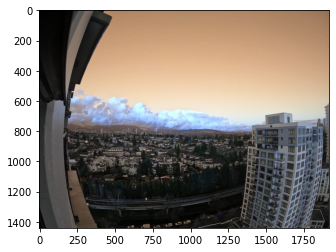

In [2]:
import matplotlib.pyplot as plt
count = 0
startingTime = time.time()
interval = 1
endingTime = startingTime + interval

while True:
    count += 1
    raw = cv2.imread('sample.JPG')
    # img = cv2.cvtColor(raw, cv2.COLOR_RGB2GRAY)
    img = raw
    if time.time() >= endingTime:
        break

print("{} times per {} second(s)".format(count,interval))
print("size: {}".format(getsizeof(np.array(img,dtype=np.int16))))

plt.imshow(img,cmap='gray')



compress

(5, 5)
size: 170
compresion ratio: 48791.388235294115


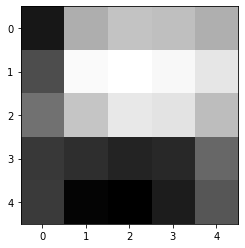

In [3]:
orig_height = img.shape[0]
orig_width = img.shape[1]
compressed_res =5

height_step = orig_height/compressed_res
width_step = orig_width/compressed_res

row_num = 0
col_num = 0
row_acc = []
acc = []
for block in range(compressed_res**2):
    if (block)%compressed_res == 0 and block != 0:
        row_num+=1
        col_num = 0
        acc.append(row_acc)
        row_acc = []
    row_acc.append(int(np.mean(img[int(height_step*row_num):int(height_step*(row_num+1)),int(col_num*width_step):int((col_num+1)*width_step)])))
    col_num+=1
acc.append(row_acc) #last row
acc = np.array(acc,dtype=np.int16)
print(acc.shape)
plt.imshow(acc,cmap='gray')

print("size: {}".format(getsizeof(acc)))

print("compresion ratio: {}".format(orig_size/getsizeof(acc)))

entire workflow

251 times per 1 second(s)
size: 920


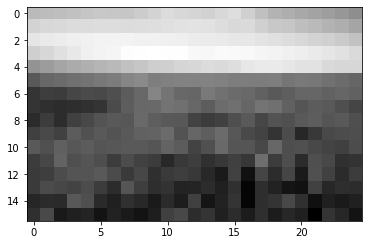

In [7]:
startingTime = time.time()
interval = 1
endingTime = startingTime + interval
count = 0
compressed_res_x = 25
path = 'sample1.jpg'

def compressed_img(path,compressed_res_x):
    raw_rgb_data = cv2.imread(path)
    raw_grayscale_data = cv2.cvtColor(raw_rgb_data, cv2.COLOR_RGB2GRAY)

    orig_height = raw_grayscale_data.shape[0]
    orig_width = raw_grayscale_data.shape[1]

    if compressed_res_x>=orig_width:
        compressed_res_x = orig_width # fail safe
        
    compressed_res_y = int(compressed_res_x*orig_height/orig_width)

    height_step = orig_height/compressed_res_y
    width_step = orig_width/compressed_res_x

    row_num = 0
    col_num = 0
    row_acc = []
    result = []
    for block in range(compressed_res_x*compressed_res_y):
        if (block)%compressed_res_x == 0 and block != 0:
            row_num+=1
            col_num = 0
            result.append(np.array(row_acc,dtype=np.int16))
            row_acc = []
        row_acc.append(int(np.mean(raw_grayscale_data[int(height_step*row_num):int(height_step*(row_num+1)),int(col_num*width_step):int((col_num+1)*width_step)])))
        col_num+=1

    result.append(np.array(row_acc,dtype=np.int16)) #last row
    result = np.array(result,dtype=np.int16)

    return result

while True:
    count += 1
    acc = compressed_img(path,compressed_res_x)

    if time.time() >= endingTime:
        break

plt.imshow(acc,cmap='gray')

print("{} times per {} second(s)".format(count,interval))
print("size: {}".format(getsizeof(acc)))


In [5]:
import cv2
from cv2 import dnn_superres

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image
image = compressed_img('sample1.jpg',400)
cv2.imwrite("./o.png", image)
# Read the desired model
path = "FSRCNN_x2.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 2)

# Upscale the image
result = sr.upsample(image)

# Save the image
cv2.imwrite("./upscaled.png", result)

True